# Measurement Uncertainty and Error Propagation

"All measurements, however careful and scientific, are subject to some uncertainties." 
-J.R Taylor in *An Introduction to Error Analysis*

## Inevitability of Uncertainty

Every time we conduct a measurement, the number we obtain comes with an associated uncertainty. This uncertainty quantifies the precision of the experiment as well as our degree of ignorance of the targeted number.

For example, every time we use a tape measure, graduated in eigths of an inch, we may be able to tell that say, the length of a window, is between 54 1/8'' and 54 2/8'' --or between 54.175 in and 54.25 in. But we are unable to precisely tell if the length is 54.18 in or 54.24 in. Moreover, if the tape measure *appears* to exactly fall at the 54 1/8''  mark, we are not able to tell accurately if the length of the window is 54.175 or 54.1750001,

## Types of error

**Measurement uncertainty** is often (but not always) used interchangeably with **experimental error**

$$({\rm measured\,A})=A_{\rm best}\pm\delta A$$

## Displaying Uncertainty in a Graph: Error bars

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

kepler_url="https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=cumulative&where=koi_disposition+like+'CONFIRMED'&format=csv"
df=pd.read_csv(kepler_url) 

In [42]:
print(df.columns)

Index(['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra_str', 'dec_str', 'koi_kepmag',
       'koi_kepmag_err'],
      dtype='object')


Now let us make an error bar graph plotting the planet radius \\( R_{\rm p}\\) (labeled 'koi_radius' in the dataframe) vs the planet period (labeled 'koi_period'). We include the uncertainties in both period and radius. Note that the uncertainty **above** the "best measurement" does not necessarily equal to the uncertainty **below** the measurement. Also, note that, although the uncertainties in the period are included

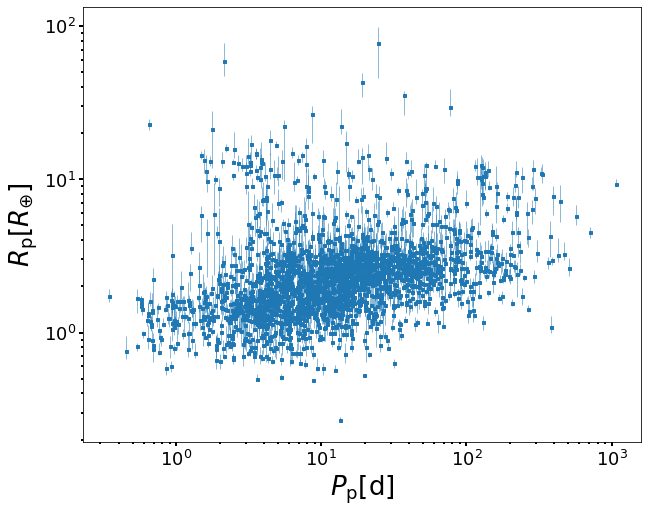

In [54]:
fig = plt.figure(1,figsize=(10,8))
ax=fig.add_subplot(111)

ax.errorbar(df['koi_period'],df['koi_prad'],yerr=[-df['koi_prad_err2'].values,df['koi_prad_err1'].values],
             xerr=[-df['koi_period_err2'].values,df['koi_period_err1'].values],fmt='s',lw=0.5,ms=3.0)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$P_{\rm p}[{\rm d}]$',size=26)
ax.set_ylabel(r'$R_{\rm p}[R_{\oplus}]$',size=26)
ax.tick_params(axis='both',width=2,length=4,labelsize=18)
ax.tick_params(axis='both',which='both',width=2)

Now, nobody went toward each planetary system and used a ruler to measure each planet's radius. So how were all these radii measured? More importantly for our current purposes: how are those radius uncertainties calculated if no ruler was used?

## Error propagation

Multiple textbooks cover the concept of *error propagation*

## Measurements as Random Variables

In [1]:
import numpy.random as rnd
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(19680801)

# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(437)